### Neural Network

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

from src.nn import Dense, Dropout, ReLU, Sigmoid, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

#### Fake Dataset

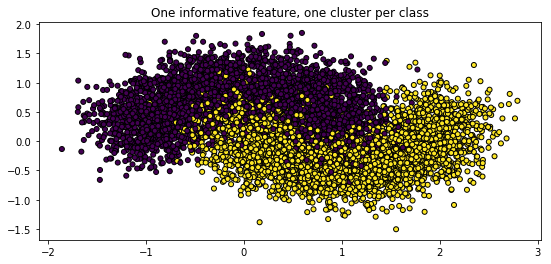

In [8]:
plt.figure(figsize=(9, 4))
plt.title("One informative feature, one cluster per class")
# X, y = make_classification(n_samples=7500, n_features=2, n_classes=3,
#                                n_redundant=0, n_informative=2, n_clusters_per_class=1)
X, y = make_moons(7500, noise=0.3)
# X, y = make_circles(7500, noise=0.05)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Epoch 1/50 =======> loss: 2.15696 - acc: 0.85962
Epoch 2/50 =======> loss: 1.83821 - acc: 0.86343
Epoch 3/50 =======> loss: 1.79156 - acc: 0.86286
Epoch 4/50 =======> loss: 1.75372 - acc: 0.86419
Epoch 5/50 =======> loss: 1.72077 - acc: 0.86476
Epoch 6/50 =======> loss: 1.69515 - acc: 0.8661
Epoch 7/50 =======> loss: 1.66652 - acc: 0.8659
Epoch 8/50 =======> loss: 1.64544 - acc: 0.86514
Epoch 9/50 =======> loss: 1.62913 - acc: 0.8661
Epoch 10/50 =======> loss: 1.61637 - acc: 0.86629
Epoch 11/50 =======> loss: 1.59826 - acc: 0.86686
Epoch 12/50 =======> loss: 1.59098 - acc: 0.86533
Epoch 13/50 =======> loss: 1.58287 - acc: 0.86648
Epoch 14/50 =======> loss: 1.57962 - acc: 0.86514
Epoch 15/50 =======> loss: 1.57131 - acc: 0.8659
Epoch 16/50 =======> loss: 1.57009 - acc: 0.86571
Epoch 17/50 =======> loss: 1.5701 - acc: 0.86476
Epoch 18/50 =======> loss: 1.56902 - acc: 0.86667
Epoch 19/50 =======> loss: 1.57446 - acc: 0.86629
Epoch 20/50 =======> loss: 1.57682 - acc: 0.8661
Epoch 21/50 ===

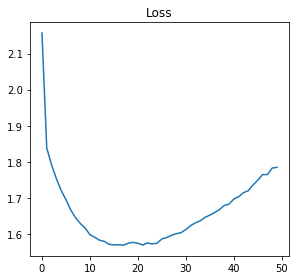

In [6]:
final_error = []
better_acc = 0

layers = (
    Dense(inputs=2, outputs=100, activation=ReLU()),
    Dense(inputs=100, outputs=100, activation=ReLU()), 
    Dense(inputs=100, outputs=100, activation=ReLU()), 
    Dense(inputs=100, outputs=100, activation=ReLU()), 
    Dense(inputs=100, outputs=2, activation=Softmax()),
)

md = NeuralNetwork(
    layers,
    X_train.copy(),
    y_train.copy(),
    loss='cross_entropy',
    batch_size=32,
    epochs=50,
    lr=1e-1)
error = md.train()

y_pred = md.predict(X_test.copy())

acc = np.round((np.sum(y_pred == y_test) / len(y_test)) * 100, 2)
if acc > better_acc:
    better_acc = acc
final_error = error
print(f'Acurácia: {acc}%')

print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

if len(final_error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(final_error)), final_error)
    plt.tight_layout()
    plt.show()

Acurácia: 91.2%
--------------------
Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=80, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1115
           1       0.93      0.90      0.91      1135

   micro avg       0.91      0.91      0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250


--------------------
Confusion matrix:
[[1034   81]
 [ 117 1018]]


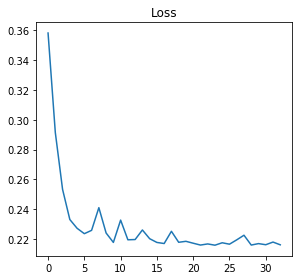

In [4]:
classifier = MLPClassifier(
    max_iter=80,
    solver='sgd',
    batch_size=64,
    shuffle=True,
    learning_rate_init=1e-1,
    random_state=42
)
classifier.fit(X_train.copy(), y_train.copy())

predicted = classifier.predict(X_test.copy())

print(f'Acurácia: {np.round(classifier.score(X_test.copy(), y_test.copy()) * 100, 2)}%')
print('-' * 20)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, predicted)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, predicted))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Loss')
plt.plot(range(classifier.n_iter_), classifier.loss_curve_)
plt.tight_layout()
plt.show()

#### MNIST Dataset Validation

Qtd Digits:  1797


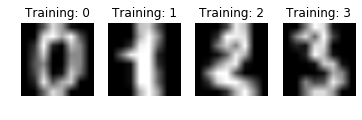

In [8]:
digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='bilinear')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)
print('Qtd Digits: ', n_samples)

# Data preparation
# Flatten
X = digits.images.reshape((n_samples, -1))
# Normalization, from 0 to 1
X /= 255.
# Targets
y = digits.target
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
final_error = []
better_acc = 0

layers = (
    Dense(inputs=64, outputs=512, activation=ReLU()),
    Dense(inputs=512, outputs=100, activation=ReLU()),
    Dense(inputs=100, outputs=100, activation=ReLU()),
    Dense(inputs=100, outputs=10, activation=Softmax()),
)

md = NeuralNetwork(
    layers,
    X_train.copy(),
    y_train.copy(),
    loss='cross_entropy',
    batch_size=32,
    epochs=250,
    lr=1e-1)
error = md.train()

y_pred = md.predict(X_test.copy())

acc = np.round((np.sum(y_pred == y_test) / len(y_test)) * 100, 2)
if acc > better_acc:
    better_acc = acc
final_error = error
print(f'Acurácia: {acc}%')

print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

if len(final_error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(final_error)), final_error)
    plt.tight_layout()
    plt.show()

Epoch 1/250 =======> loss: 3.04046 - acc: 0.09626
Epoch 2/250 =======> loss: 2.33715 - acc: 0.10581
Epoch 3/250 =======> loss: 2.32677 - acc: 0.10581
Epoch 4/250 =======> loss: 2.31349 - acc: 0.10581
Epoch 5/250 =======> loss: 2.30648 - acc: 0.10581
Epoch 6/250 =======> loss: 2.28626 - acc: 0.10581
Epoch 7/250 =======> loss: 2.23791 - acc: 0.17979
Epoch 8/250 =======> loss: 2.16332 - acc: 0.20127
Epoch 9/250 =======> loss: 2.09994 - acc: 0.20684
Epoch 10/250 =======> loss: 2.05585 - acc: 0.20684
Epoch 11/250 =======> loss: 2.02525 - acc: 0.20207
Epoch 12/250 =======> loss: 2.00257 - acc: 0.20843
Epoch 13/250 =======> loss: 1.98874 - acc: 0.20605
Epoch 14/250 =======> loss: 1.97783 - acc: 0.20843
Epoch 15/250 =======> loss: 1.967 - acc: 0.21082
Epoch 16/250 =======> loss: 1.96041 - acc: 0.20525
Epoch 17/250 =======> loss: 1.95642 - acc: 0.20605
Epoch 18/250 =======> loss: 1.94939 - acc: 0.20446
Epoch 19/250 =======> loss: 1.94777 - acc: 0.21002
Epoch 20/250 =======> loss: 1.94056 - acc:

Epoch 162/250 =======> loss: 1.00723 - acc: 0.62291
Epoch 163/250 =======> loss: 0.97666 - acc: 0.63803
Epoch 164/250 =======> loss: 0.95235 - acc: 0.65632
Epoch 165/250 =======> loss: 0.92534 - acc: 0.57359
Epoch 166/250 =======> loss: 0.90444 - acc: 0.68258
Epoch 167/250 =======> loss: 0.89839 - acc: 0.63405
Epoch 168/250 =======> loss: 0.87744 - acc: 0.64916
Epoch 169/250 =======> loss: 0.8487 - acc: 0.67064
Epoch 170/250 =======> loss: 0.84985 - acc: 0.71519
Epoch 171/250 =======> loss: 0.85643 - acc: 0.7327
Epoch 172/250 =======> loss: 0.81332 - acc: 0.72156
Epoch 173/250 =======> loss: 0.82072 - acc: 0.7677
Epoch 174/250 =======> loss: 0.80781 - acc: 0.74065
Epoch 175/250 =======> loss: 0.79837 - acc: 0.72235
Epoch 176/250 =======> loss: 0.81367 - acc: 0.75895
Epoch 177/250 =======> loss: 0.7775 - acc: 0.76452
Epoch 178/250 =======> loss: 0.76404 - acc: 0.77088
Epoch 179/250 =======> loss: 0.7458 - acc: 0.72951
Epoch 180/250 =======> loss: 0.75496 - acc: 0.70724
Epoch 181/250 ===

KeyboardInterrupt: 

Acurácia: 95.37%
--------------------
Classification report for classifier MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.87      0.90      0.89        52
           2       1.00      0.94      0.97        53
           3       1.00      0.94      0.97        54
           4       0.96      1.00      0.98        48
           5       0.96      0.93      0.95        57
           6       0.98      0.98      0.98        60
           7       1.00      0.92      0.96        53
           8       0.93      0.93      0.93        61
           9       0.86      0.98      0.92        57

   micro avg       0.95      0.95      0.95       540
   macro avg       0.96      0.95      0.96       540
weighted avg       0.96      0.95      0.95       540


--------------------
Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  3  2]
 [ 0  3 50  0  0  0  0  0  0  0]
 [ 0  0  0 5

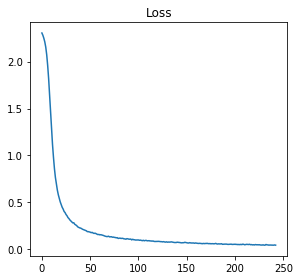

In [15]:
classifier = MLPClassifier(
    max_iter=1500,
    solver='sgd',
    batch_size=64,
    shuffle=True,
    learning_rate_init=1e-1,
    random_state=42
)
classifier.fit(X_train.copy(), y_train.copy())

predicted = classifier.predict(X_test.copy())

print(f'Acurácia: {np.round(classifier.score(X_test.copy(), y_test.copy()) * 100, 2)}%')
print('-' * 20)
print("Classification report for classifier %s:\n%s\n"
      % (classifier.__class__.__name__, classification_report(y_test, predicted)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, predicted))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Loss')
plt.plot(range(classifier.n_iter_), classifier.loss_curve_)
plt.tight_layout()
plt.show()